In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug=pd.read_csv(mouse_drug_data_to_load)
clinical_trial=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_data=pd.merge(clinical_trial, mouse_drug, how= 'left', on="Mouse ID")

# Display the data table for preview


combined_data.head()
                       

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame

mean_tumor=pd.merge(mouse_drug, clinical_trial)
mean_tumor=mean_tumor.groupby(["Drug", "Timepoint"],as_index=False).mean()

# Preview DataFrame
mean_tumor.head()





,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [3]:
#Formatting the previous dataframe to exclude the metastatic sites

mean_without_meta=mean_tumor
mean_without_meta=mean_without_meta.drop('Metastatic Sites', axis=1)
mean_without_meta.reset_index()
mean_without_meta.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor=pd.merge(mouse_drug, clinical_trial)
se_tumor=se_tumor.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
se_tumor=pd.DataFrame(se_tumor)

# Preview DataFrame

se_tumor.head().reset_index()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
se_tumor = se_tumor.reset_index()
se_tumor_pivot=se_tumor.pivot(index='Timepoint', columns="Drug")["Tumor Volume (mm3)"]
se_tumor_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
# Minor Data Munging to Re-Format the Data Frames

mean_without_meta=mean_without_meta.pivot(index='Timepoint', columns="Drug")

# Preview that Reformatting worked
mean_without_meta.head()


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

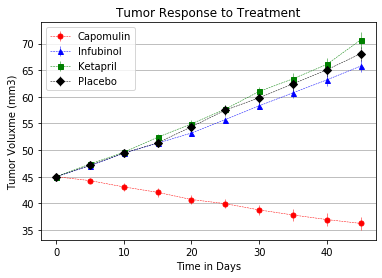

In [7]:
# Generate the Plot (with Error Bars)

#graph=mean_without_meta.plot.line()


plt.errorbar(x=mean_without_meta.index, y=mean_without_meta.iloc[:,0], yerr=se_tumor_pivot.iloc[:,0], label="Capomulin", color="r", marker="o", markersize=5, ls="dashed", linewidth=0.50)
plt.errorbar(x=mean_without_meta.index, y=mean_without_meta.iloc[:,2], yerr=se_tumor_pivot.iloc[:,2], label="Infubinol", color="b", marker="^", markersize=5, ls="dashed", linewidth=0.50)
plt.errorbar(x=mean_without_meta.index, y=mean_without_meta.iloc[:,3], yerr=se_tumor_pivot.iloc[:,3], label="Ketapril", color="g", marker="s", markersize=5, ls="dashed", linewidth=0.50)
plt.errorbar(x=mean_without_meta.index, y=mean_without_meta.iloc[:,5], yerr=se_tumor_pivot.iloc[:,5], label="Placebo", color="k", marker="D", markersize=5, ls="dashed", linewidth=0.50)

plt.ylabel("Tumor Voluxme (mm3)")
plt.xlabel("Time in Days")
plt.grid(axis='y')
plt.legend(loc='best')

plt.title("Tumor Response to Treatment")


# Save the Figure

plt.savefig("Tumor Response to Treatment.png")

#Show the figure
plt.show()

In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_meta=pd.merge(mouse_drug, clinical_trial)
mean_meta=mean_meta.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_meta=pd.DataFrame(mean_meta)

# Preview DataFrame
mean_meta.head()




Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

se_meta=pd.merge(mouse_drug, clinical_trial)
se_meta=se_meta.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame

se_meta=pd.DataFrame(se_meta)

# Preview DataFrame
se_meta.head().reset_index()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
se_meta=se_meta.reset_index()
se_meta_pivot=se_meta.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mean_meta=mean_meta.reset_index()
mean_meta=mean_meta.pivot(index='Timepoint', columns="Drug")

# Preview that Reformatting worked
mean_meta.head()


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

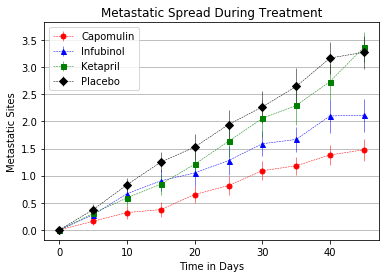

In [13]:
# Generate the Plot (with Error Bars)

#meta_graph=mean_meta.plot.line()

plt.errorbar(x=mean_meta.index, y=mean_meta.iloc[:,0], yerr=se_meta_pivot.iloc[:,0], label="Capomulin", color="r", marker="o", markersize=5, ls="dashed", linewidth=0.50)
plt.errorbar(x=mean_meta.index, y=mean_meta.iloc[:,2], yerr=se_meta_pivot.iloc[:,2], label="Infubinol", color="b", marker="^", markersize=5, ls="dashed", linewidth=0.50)
plt.errorbar(x=mean_meta.index, y=mean_meta.iloc[:,3], yerr=se_meta_pivot.iloc[:,3], label="Ketapril", color="g", marker="s", markersize=5, ls="dashed", linewidth=0.50)
plt.errorbar(x=mean_meta.index, y=mean_meta.iloc[:,5], yerr=se_meta_pivot.iloc[:,5], label="Placebo", color="k", marker="D", markersize=5, ls="dashed", linewidth=0.50)




plt.ylabel("Metastatic Sites")
plt.xlabel("Time in Days")
plt.grid(axis='y')

plt.legend(loc='best')
plt.title("Metastatic Spread During Treatment")

# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

survival=pd.merge(mouse_drug, clinical_trial)
survival=survival.groupby(["Drug", "Timepoint"],as_index=False)["Mouse ID"].count()

# Convert to DataFrame
survival=pd.DataFrame(survival)

# Preview DataFrame

survival.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames

survival=survival.pivot(index='Timepoint', columns="Drug")

# Preview the Data Frame

survival

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [16]:
surv_per=survival

value=surv_per.iloc[0]

surv_per.iloc[9]=(surv_per.iloc[9]/value)*100
surv_per.iloc[8]=(surv_per.iloc[8]/value)*100
surv_per.iloc[7]=(surv_per.iloc[7]/value)*100
surv_per.iloc[6]=(surv_per.iloc[6]/value)*100
surv_per.iloc[5]=(surv_per.iloc[5]/value)*100
surv_per.iloc[4]=(surv_per.iloc[4]/value)*100
surv_per.iloc[3]=(surv_per.iloc[3]/value)*100
surv_per.iloc[2]=(surv_per.iloc[2]/value)*100
surv_per.iloc[1]=(surv_per.iloc[1]/value)*100
surv_per.iloc[0]=100





#surv_per.head()
surv_per

Mouse ID                                                           \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo    Propriva   
Timepoint                                                                      
0             100.0    100.0     100.0    100.0    100.0   100.0  100.000000   
5             100.0     84.0     100.0     92.0     92.0    96.0   96.153846   
10            100.0     80.0      84.0     88.0     84.0    96.0   88.461538   
15             96.0     76.0      84.0     76.0     84.0    80.0   65.384615   
20             92.0     72.0      80.0     76.0     80.0    76.0   65.384615   
25             88.0     72.0      72.0     76.0     72.0    68.0   53.846154   
30             88.0     64.0      68.0     72.0     60.0    60.0   50.000000   
35             88.0     56.0      48.0     68.0     60.0    56.0   38.461538   
40             84.0     56.0      40.0     60.0     60.0    48.0   34.615385   
45             84.0     52.0      36.0     44.0     52.0    44.0   26.923077   

                                          
Drug      Ramicane    Stelasyn Zoniferol  
Timepoint                                 
0            100.0  100.000000     100.0  
5            100.0   96.153846      96.0  
10            96.0   88.461538      88.0  
15            96.0   88.461538      84.0  
20            92.0   80.769231      68.0  
25            92.0   73.076923      64.0  
30            92.0   69.230769      60.0  
35            84.0   61.538462      56.0  
40            80.0   46.153846      56.0  
45            80.0   42.307692      56.0

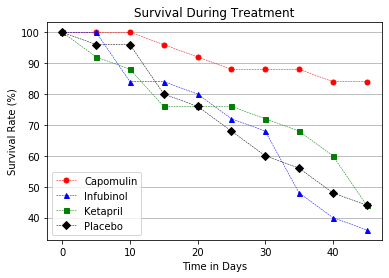

In [17]:
# Generate the Plot (Accounting for percentages)

#surv_per_graph=surv_per.plot.line()

plt.errorbar(x=surv_per.index, y=surv_per.iloc[:,0], yerr=None, label="Capomulin", color="r", marker="o", markersize=5, ls="dashed", linewidth=0.50)
plt.errorbar(x=surv_per.index, y=surv_per.iloc[:,2], yerr=None, label="Infubinol", color="b", marker="^", markersize=5, ls="dashed", linewidth=0.50)
plt.errorbar(x=surv_per.index, y=surv_per.iloc[:,3], yerr=None, label="Ketapril", color="g", marker="s", markersize=5, ls="dashed", linewidth=0.50)
plt.errorbar(x=surv_per.index, y=surv_per.iloc[:,5], yerr=None, label="Placebo", color="k", marker="D", markersize=5, ls="dashed", linewidth=0.50)




plt.ylabel("Survival Rate (%)")
plt.xlabel("Time in Days")
plt.grid(axis='y')

plt.legend(loc='best')
plt.title("Survival During Treatment")

# Save the Figure
plt.savefig("Survival During Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

summary_change=mean_without_meta

Capomulin=((summary_change.iloc[9][0]-summary_change.iloc[0][0])/summary_change.iloc[0][0])*100
Ceftamin=((summary_change.iloc[9][1]-summary_change.iloc[0][1])/summary_change.iloc[0][1])*100
Infubinol=((summary_change.iloc[9][2]-summary_change.iloc[0][2])/summary_change.iloc[0][2])*100
Ketapril=((summary_change.iloc[9][3]-summary_change.iloc[0][3])/summary_change.iloc[0][3])*100
Naftisol=((summary_change.iloc[9][4]-summary_change.iloc[0][4])/summary_change.iloc[0][4])*100
Placebo=((summary_change.iloc[9][5]-summary_change.iloc[0][5])/summary_change.iloc[0][5])*100
Propriva=((summary_change.iloc[9][6]-summary_change.iloc[0][6])/summary_change.iloc[0][6])*100
Ramicane=((summary_change.iloc[9][7]-summary_change.iloc[0][7])/summary_change.iloc[0][7])*100
Stelasyn=((summary_change.iloc[9][8]-summary_change.iloc[0][8])/summary_change.iloc[0][8])*100
Zoniferol=((summary_change.iloc[9][9]-summary_change.iloc[0][9])/summary_change.iloc[0][9])*100

# Display the data to confirm

summary_df=pd.DataFrame({'Capomulin':Capomulin,"Ceftamin":Ceftamin, "Infubinol":Infubinol,"Ketapril":Ketapril, "Naftisol":Naftisol, "Placebo":Placebo,"Propriva":Propriva, "Ramicane":Ramicane,"Stelasyn":Stelasyn, "Zoniferol":Zoniferol},index=[0])
summary_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,47.241175,-22.3209,52.085134,46.579751


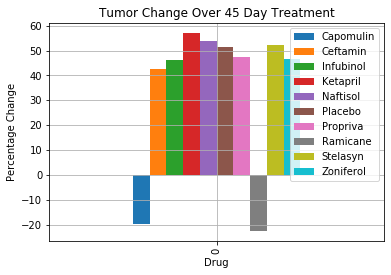

In [19]:
# Store all Relevant Percent Changes into a Tuple

Percent_change=(-19.47, 42.52, 46.12, 57.028)
Percent_Bins=(-20,0,60)
Drugs=('Capomulin','Ceftamin', 'Infubinol', 'Ketapril')
Percent_Labels=("Passing Drugs", "Failing Drugs")
               
# Splice the data between passing and failing drugs

pd.cut(Drugs, bins=Percent_Bins, labels=Percent_Labels)
# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


#Percent Change in Tumor Volume")
summary_df.plot.bar()
plt.xlabel("Drug")
plt.ylabel("Percentage Change")
plt.grid()

plt.legend(loc='best')
plt.title("Tumor Change Over 45 Day Treatment")


# Save the Figure
plt.savefig("Tumor Change over 45 Day Treatment")

# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)